# Quickstart: Pandas API on Spark

The pandas API on Spark, accessible via pyspark.pandas, is a distributed version of the popular pandas library. It brings the ease and familiarity of pandas syntax to big data processing by leveraging Apache Spark's distributed computing capabilities. This allows users to perform data analysis on large datasets that exceed a single machine's memory.

### Key Features
* **Familiar Syntax:** Uses pandas-like syntax, making it easier for users familiar with pandas to transition to big data.
* **Scalability:** Handles large datasets by distributing computations across a Spark cluster.
* **Interoperability:** Seamlessly converts between pandas-on-Spark DataFrames and Spark DataFrames.

Convert pandas-on-Spark DataFrame to Spark DataFrame:
```python
# pandas-on-Spark DataFrame
df_pandas_on_spark = ps.read_csv('data.csv')

# Convert to Spark DataFrame
df_spark = df_pandas_on_spark.to_spark()
```

Convert Spark DataFrame to pandas-on-Spark DataFrame:
```python
# Spark DataFrame
df_spark = spark.read.csv('data.csv', header=True, inferSchema=True)

# Convert to pandas-on-Spark DataFrame
df_pandas_on_spark = ps.DataFrame(df_spark)
```

This is a short introduction to pandas API on Spark, geared mainly for new users. This notebook shows you some key differences between pandas and pandas API on Spark. This notebook comes from the documentation on pandas API on Spark' at [the quickstart page](https://spark.apache.org/docs/latest/api/python/getting_started/index.html).

Customarily, we import pandas API on Spark as follows:

In [1]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

/usr/lib/spark/python/pyspark/pandas/__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


## Object Creation



Creating a pandas-on-Spark Series by passing a list of values, letting pandas API on Spark create a default integer index:

In [2]:
s = ps.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a pandas-on-Spark DataFrame by passing a dict of objects that can be converted to series-like.

In [4]:
psdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [5]:
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [9]:
pdf

,A,B,C,D
2013-01-01,-0.572048,-1.004735,0.061637,-0.560157
2013-01-02,-1.334531,-1.055884,1.541054,-0.708933
2013-01-03,1.606985,0.019439,0.130160,0.541933
2013-01-04,0.911210,1.071345,2.022815,0.111586
2013-01-05,0.019177,-0.667545,0.798673,-0.415209
2013-01-06,0.621484,0.527591,-0.185706,-0.744188


Now, this pandas DataFrame can be converted to a pandas-on-Spark DataFrame

In [10]:
psdf = ps.from_pandas(pdf)

In [11]:
type(psdf)

pyspark.pandas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame.

In [12]:
psdf

,A,B,C,D
2013-01-01,-0.572048,-1.004735,0.061637,-0.560157
2013-01-02,-1.334531,-1.055884,1.541054,-0.708933
2013-01-03,1.606985,0.019439,0.130160,0.541933
2013-01-04,0.911210,1.071345,2.022815,0.111586
2013-01-05,0.019177,-0.667545,0.798673,-0.415209
2013-01-06,0.621484,0.527591,-0.185706,-0.744188


Also, it is possible to create a pandas-on-Spark DataFrame from Spark DataFrame easily.

Creating a Spark DataFrame from pandas DataFrame

In [13]:
sdf = spark.createDataFrame(pdf)

In [14]:
sdf.show()

+--------------------+-------------------+-------------------+-------------------+
|                   A|                  B|                  C|                  D|
+--------------------+-------------------+-------------------+-------------------+
| -0.5720476886309734|-1.0047347572991203|0.06163724507907689| -0.560156971242382|
| -1.3345307718668873|-1.0558840568663868| 1.5410539001773005|-0.7089327497791156|
|  1.6069845831548857|0.01943916194225854|0.13016012827418316| 0.5419331790866506|
|  0.9112098012548341|   1.07134511339913| 2.0228154407731767|0.11158614269041377|
|0.019177162714134537|-0.6675449221788289| 0.7986729996476273|-0.4152090844918315|
|  0.6214839036492921| 0.5275912899985918|-0.1857058005385511|-0.7441879694875451|
+--------------------+-------------------+-------------------+-------------------+



Creating pandas-on-Spark DataFrame from Spark DataFrame.

In [15]:
psdf = sdf.pandas_api()

In [16]:
psdf

,A,B,C,D
0,-0.572048,-1.004735,0.061637,-0.560157
1,-1.334531,-1.055884,1.541054,-0.708933
2,1.606985,0.019439,0.130160,0.541933
3,0.911210,1.071345,2.022815,0.111586
4,0.019177,-0.667545,0.798673,-0.415209
5,0.621484,0.527591,-0.185706,-0.744188


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [17]:
psdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

Here is how to show top rows from the frame below.

Note that the data in a Spark dataframe does not preserve the natural order by default. The natural order can be preserved by setting `compute.ordered_head` option but it causes a performance overhead with sorting internally.

In [18]:
psdf.head()

,A,B,C,D
0,-0.572048,-1.004735,0.061637,-0.560157
1,-1.334531,-1.055884,1.541054,-0.708933
2,1.606985,0.019439,0.130160,0.541933
3,0.911210,1.071345,2.022815,0.111586
4,0.019177,-0.667545,0.798673,-0.415209


Displaying the index, columns, and the underlying numpy data.

In [19]:
psdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [20]:
psdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
psdf.to_numpy()

/usr/lib/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


array([[-0.57204769, -1.00473476,  0.06163725, -0.56015697],
       [-1.33453077, -1.05588406,  1.5410539 , -0.70893275],
       [ 1.60698458,  0.01943916,  0.13016013,  0.54193318],
       [ 0.9112098 ,  1.07134511,  2.02281544,  0.11158614],
       [ 0.01917716, -0.66754492,  0.798673  , -0.41520908],
       [ 0.6214839 ,  0.52759129, -0.1857058 , -0.74418797]])

Showing a quick statistic summary of your data

In [22]:
psdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.208713,-0.184965,0.728106,-0.295828
std,1.062653,0.870774,0.892066,0.514516
min,-1.334531,-1.055884,-0.185706,-0.744188
25%,-0.572048,-1.004735,0.061637,-0.708933
50%,0.019177,-0.667545,0.130160,-0.560157
75%,0.911210,0.527591,1.541054,0.111586
max,1.606985,1.071345,2.022815,0.541933


Transposing your data

In [23]:
psdf.T

,0,1,2,3,4,5
A,-0.572048,-1.334531,1.606985,0.911210,0.019177,0.621484
B,-1.004735,-1.055884,0.019439,1.071345,-0.667545,0.527591
C,0.061637,1.541054,0.130160,2.022815,0.798673,-0.185706
D,-0.560157,-0.708933,0.541933,0.111586,-0.415209,-0.744188


Sorting by its index

In [24]:
psdf.sort_index(ascending=False)

,A,B,C,D
5,0.621484,0.527591,-0.185706,-0.744188
4,0.019177,-0.667545,0.798673,-0.415209
3,0.911210,1.071345,2.022815,0.111586
2,1.606985,0.019439,0.130160,0.541933
1,-1.334531,-1.055884,1.541054,-0.708933
0,-0.572048,-1.004735,0.061637,-0.560157


Sorting by value

In [25]:
psdf.sort_values(by='B')

,A,B,C,D
1,-1.334531,-1.055884,1.541054,-0.708933
0,-0.572048,-1.004735,0.061637,-0.560157
4,0.019177,-0.667545,0.798673,-0.415209
2,1.606985,0.019439,0.130160,0.541933
5,0.621484,0.527591,-0.185706,-0.744188
3,0.911210,1.071345,2.022815,0.111586


## Missing Data
Pandas API on Spark primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [26]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [27]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [28]:
psdf1 = ps.from_pandas(pdf1)

In [29]:
psdf1

,A,B,C,D,E
2013-01-01,-0.572048,-1.004735,0.061637,-0.560157,1.0
2013-01-02,-1.334531,-1.055884,1.541054,-0.708933,1.0
2013-01-03,1.606985,0.019439,0.130160,0.541933,NaN
2013-01-04,0.911210,1.071345,2.022815,0.111586,NaN


To drop any rows that have missing data.

In [30]:
psdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.572048,-1.004735,0.061637,-0.560157,1.0
2013-01-02,-1.334531,-1.055884,1.541054,-0.708933,1.0


Filling missing data.

In [31]:
psdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.572048,-1.004735,0.061637,-0.560157,1.0
2013-01-02,-1.334531,-1.055884,1.541054,-0.708933,1.0
2013-01-03,1.606985,0.019439,0.130160,0.541933,5.0
2013-01-04,0.911210,1.071345,2.022815,0.111586,5.0


## Operations

### Stats
Performing a descriptive statistic:

In [32]:
psdf.mean()

A    0.208713
B   -0.184965
C    0.728106
D   -0.295828
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in pandas API on Spark.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See also <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a> in PySpark documentation.

In [33]:
prev = spark.conf.get("spark.sql.execution.arrow.pyspark.enabled")  # Keep its default value.
ps.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [34]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)
%timeit ps.range(300000).to_pandas()

223 ms ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", False)
%timeit ps.range(300000).to_pandas()

929 ms ± 60.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [37]:
psdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [38]:
psdf

,A,B,C,D
0,foo,one,0.297823,0.480578
1,bar,one,1.352217,-0.115758
2,foo,two,-0.960399,-0.047368
3,bar,three,0.059389,-0.157143
4,foo,two,-0.458427,-0.007356
5,bar,two,0.705815,1.046128
6,foo,one,2.063032,0.710410
7,foo,three,-0.104965,-2.243937


Grouping and then applying the [sum()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.groupby.GroupBy.sum.html) function to the resulting groups.

In [39]:
psdf.groupby('A').sum()

,C,D
A,,
bar,2.117421,0.773227
foo,0.837064,-1.107673


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [40]:
psdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one    2.360855  1.190988
    two   -1.418826 -0.054724
bar three  0.059389 -0.157143
    one    1.352217 -0.115758
foo three -0.104965 -2.243937
bar two    0.705815  1.046128

## Plotting

In [41]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [42]:
psser = ps.Series(pser)

In [43]:
psser = psser.cummax()

24/10/06 23:32:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:30 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


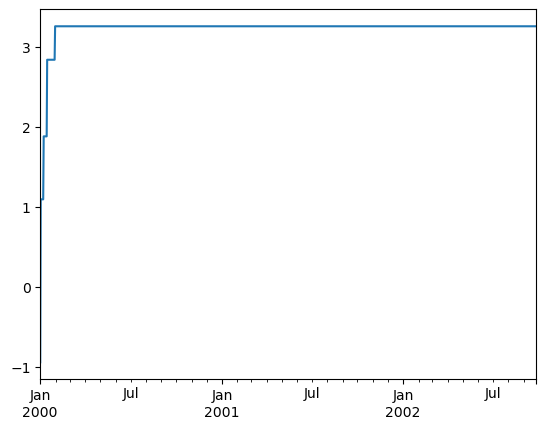

In [44]:
psser.plot(backend='matplotlib');

On a DataFrame, the [plot()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html) method is a convenience to plot all of the columns with labels:

In [45]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [46]:
psdf = ps.from_pandas(pdf)

In [47]:
psdf = psdf.cummax()

24/10/06 23:32:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


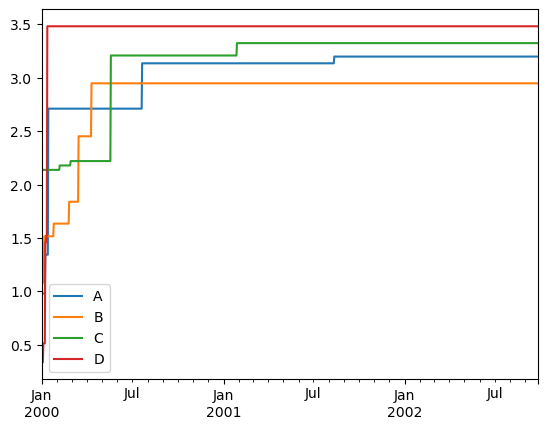

In [48]:
psdf.plot(backend='matplotlib');

For more details, [Plotting](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/frame.html#plotting) documentation.

## Getting data in/out

### CSV

CSV is straightforward and easy to use. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_csv.html) to write a CSV file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_csv.html) to read a CSV file.

In [49]:
psdf.to_csv('foo.csv')
ps.read_csv('foo.csv').head(10)

24/10/06 23:32:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,A,B,C,D
0,0.979948,1.082934,2.137251,0.336092
1,0.979948,1.082934,2.137251,0.336092
2,0.979948,1.082934,2.137251,0.336092
3,0.979948,1.082934,2.137251,0.512867
4,0.979948,1.082934,2.137251,0.512867
5,0.979948,1.515511,2.137251,0.512867
6,0.979948,1.515511,2.137251,0.512867
7,1.343157,1.515511,2.137251,1.456467
8,1.343157,1.515511,2.137251,1.456467
9,1.343157,1.515511,2.137251,1.522057


### Parquet

Parquet is an efficient and compact file format to read and write faster. See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_parquet.html) to write a Parquet file and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_parquet.html) to read a Parquet file.

In [50]:
psdf.to_parquet('bar.parquet')
ps.read_parquet('bar.parquet').head(10)

24/10/06 23:32:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,A,B,C,D
0,0.979948,1.082934,2.137251,0.336092
1,0.979948,1.082934,2.137251,0.336092
2,0.979948,1.082934,2.137251,0.336092
3,0.979948,1.082934,2.137251,0.512867
4,0.979948,1.082934,2.137251,0.512867
5,0.979948,1.515511,2.137251,0.512867
6,0.979948,1.515511,2.137251,0.512867
7,1.343157,1.515511,2.137251,1.456467
8,1.343157,1.515511,2.137251,1.456467
9,1.343157,1.515511,2.137251,1.522057


### Spark IO

In addition, pandas API on Spark fully supports Spark's various datasources such as ORC and an external datasource.  See [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.to_orc.html) to write it to the specified datasource and [here](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.read_orc.html) to read it from the datasource.

In [51]:
psdf.to_spark_io('zoo.orc', format="orc")
ps.read_spark_io('zoo.orc', format="orc").head(10)

24/10/06 23:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/06 23:32:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,A,B,C,D
0,0.979948,1.082934,2.137251,0.336092
1,0.979948,1.082934,2.137251,0.336092
2,0.979948,1.082934,2.137251,0.336092
3,0.979948,1.082934,2.137251,0.512867
4,0.979948,1.082934,2.137251,0.512867
5,0.979948,1.515511,2.137251,0.512867
6,0.979948,1.515511,2.137251,0.512867
7,1.343157,1.515511,2.137251,1.456467
8,1.343157,1.515511,2.137251,1.456467
9,1.343157,1.515511,2.137251,1.522057


See the [Input/Output](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/io.html) documentation for more details.